# Projeto Final

# Setup

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Regressão Linear
from sklearn.linear_model import LogisticRegression #Regressão Linear
from sklearn import svm #Máquina de Vetor de Suporte
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', 100)

# Construção da Base

In [7]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['B']: 'red',
                      activity_codes_mapping['C']: 'blue',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['G']: 'greenyellow',
                      activity_codes_mapping['H']: 'magenta',
                      activity_codes_mapping['I']: 'gold',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',
                      activity_codes_mapping['L']: 'lightgreen',
                      activity_codes_mapping['M']: 'violet',
                      activity_codes_mapping['O']: 'limegreen',
                      activity_codes_mapping['P']: 'deepskyblue',   
                      activity_codes_mapping['Q']: 'mediumspringgreen',
                      activity_codes_mapping['R']: 'plum',
                      activity_codes_mapping['S']: 'olive'}
#                     activity_codes_mapping['A']: 'rgb(231, 41, 138)',

In [8]:
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)

93

In [9]:
import glob

#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = r'/content/drive/MyDrive/Data/wisdm-dataset/arff_files/phone/gyro'
all_files_2 = glob.glob('/content/drive/MyDrive/Data/wisdm-dataset/arff_files/phone/gyro' + "/*.arff")

list_dfs_phone_gyro = []

for filename in all_files_2:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df_2 = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_gyro.append(df_2)

all_phone_gyro = pd.concat(list_dfs_phone_gyro, axis=0, ignore_index=True, sort=False)

all_phone_gyro

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.0,0.355,0.645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430,0.570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.515,0.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.162648,0.030922,-0.009236,36.4151,32.7119,35.7407,0.494185,0.333930,0.309048,0.043845,0.030331,0.029762,0.209391,0.174158,0.172516,0.178395,0.252154,0.251749,0.251074,0.250130,0.248919,0.247441,0.245698,0.243692,0.241425,0.238900,0.236119,0.233084,0.152518,0.215577,0.215231,0.214654,0.213847,0.212812,0.211548,0.210058,0.208343,0.206405,0.204246,0.201868,0.199274,0.146087,0.206487,0.206155,0.205603,0.204830,0.203838,0.202628,0.201201,0.199558,0.197702,0.195634,0.193356,0.190871,0.227335,0.009310,-0.227205,0.216727,0.015383,-0.226268,0.797240,1606
1,A,0.0,0.490,0.510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505,0.495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.530,0.470,0.0,0.0,0.0,0.0,0.0,0,0.0,-0.000360,-0.003085,-0.001385,38.0392,32.8814,40.4348,0.391161,0.266067,0.277535,0.033576,0.025886,0.026319,0.183237,0.160890,0.162233,0.133708,0.188990,0.188687,0.188181,0.187474,0.186566,0.185458,0.184152,0.182648,0.180949,0.179056,0.176972,0.174698,0.125498,0.177386,0.177101,0.176626,0.175962,0.175110,0.174070,0.172844,0.171433,0.169838,0.168062,0.166105,0.163971,0.110655,0.156406,0.156155,0.155736,0.155151,0.154399,0.153483,0.152402,0.151157,0.149751,0.148185,0.146460,0.144578,0.099731,0.016914,-0.101934,0.099728,0.016911,-0.101969,0.644575,1606
2,A,0.0,0.475,0.525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.445,0.555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505,0.495,0.0,0.0,0.0,0.0,0.0,0,0.0,0.001251,-0.000332,-0.008082,35.4545,33.8596,37.3077,0.319244,0.254257,0.282346,0.027016,0.023280,0.025519,0.164364,0.152578,0.159747,0.100913,0.142636,0.142407,0.142025,0.141492,0.140806,0.139970,0.138984,0.137850,0.136567,0.135139,0.133565,0.131849,0.103179,0.145839,0.145604,0.145214,0.144668,0.143968,0.143113,0.142105,0.140945,0.139634,0.138173,0.136564,0.134809,0.091921,0.129926,0.129718,0.129370,0.128884,0.128260,0.127498,0.126600,0.125566,0.124398,0.123097,0.121664,0.120101,0.031456,-0.137382,-0.017873,0.031460,-0.137343,-0.017900,0.570100,1606
3,A,0.0,0.495,0.505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490,0.510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490,0.510,0.0,0.0,0.0,0.0,0.0,0,0.0,-0.001880,-0.013833,0.004144,33.5088,32.6667,37.0588,0.293058,0.247527,0.248924,0.024585,0.022732,0.023807,0.156797,0.150772,0.154295,0.086499,0.122262,0.122066,0.121738,0.121281,0.120694,0.119977,0.119132,0.118159,0.117060,0.115836,0.114487,0.113016,0.099418,0.140523,0.140297,0.139921,0.139396,0.138721,0.137897,0.136926,0.135808,0.134544,0.133137,0.131587,0.129896,0.081891,0.115749,0.115563,0.115253,0.114820,0.114264,0.113585,0.112785,0.111864,0.110824,0.109665,0.108388,0.106995,-0.035450,0.054846,-0.084045,-0.035716,0.054918,-0.083599,0.527666,1606
4,A,0.0,0.485,0.515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.485,0.515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505,0.495,0.0,0.0,0.0,0.0,0.0,0,0.0,0.001143,0.008102,-0.005478,35.0909,32.1667,36.9811,0.375009,0.259473,0.252922,0.034593,0.023520,0.022978,0.185991,0.153362,0.151586,0.123460,0.174506,0.174225,0.173758,0.173105,0.172267,0.171244,0.170038,0.168650,0.167081,0.165333,0.163408,0.161309,0.113872,0.160953,0.160694,0.160264,0.159661,0.158888,0.157945,0.156832,0.155552,0.154105,0.152493,0.150717,0.148781,0.090622,0.128090,0.127884,0.127542,0.127062,0.126447,0.125696,0.124811,0.123792,0.122640,0.121357,0.119945,0.118403,0.235158,-0.017223,-0.073822,0.235172,-0.017186,-0.073444,0.598494,1606
..

In [10]:
import glob

#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = r'/content/drive/MyDrive/Data/wisdm-dataset/arff_files/phone/accel'
all_files = glob.glob('/content/drive/MyDrive/Data/wisdm-dataset/arff_files/phone/accel' + "/*.arff")

list_dfs_phone_accel = []

for filename in all_files:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_accel.append(df)

all_phone_accel = pd.concat(list_dfs_phone_accel, axis=0, ignore_index=True, sort=False)

all_phone_accel

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.205,0.130,0.300,0.175,0.065,0.080,0.03,0.010,0.005,0.0,0.01,0.005,0.045,0.155,0.170,0.185,0.185,0.115,0.065,0.065,0.245,0.275,0.240,0.090,0.065,0.045,0.025,0.005,0.005,0.005,1.66937,9.23358,0.278637,31.8644,33.9655,34.7273,3.334950,4.056430,3.628560,0.309289,0.352856,0.345997,0.556138,0.594016,0.588215,0.465415,0.657844,0.656788,0.655027,0.652566,0.649406,0.645550,0.641003,0.635769,0.629855,0.623266,0.616010,0.608095,0.495246,0.700008,0.698883,0.697010,0.694391,0.691028,0.686925,0.682087,0.676518,0.670225,0.663214,0.655493,0.647069,0.482193,0.681558,0.680463,0.678640,0.676089,0.672815,0.668820,0.664109,0.658687,0.652560,0.645734,0.638216,0.630015,0.355715,0.255810,0.098828,0.094608,0.252518,0.102834,11.44030,1603
1,A,0.210,0.135,0.325,0.230,0.055,0.020,0.02,0.005,0.000,0.0,0.00,0.000,0.010,0.110,0.225,0.175,0.235,0.130,0.050,0.065,0.180,0.325,0.255,0.120,0.070,0.015,0.010,0.025,0.000,0.000,1.04253,9.86146,0.291889,33.0508,31.6129,35.4545,2.851100,3.442400,3.056890,0.257355,0.301122,0.295486,0.507302,0.548746,0.543586,0.436088,0.616392,0.615402,0.613753,0.611446,0.608485,0.604872,0.600612,0.595708,0.590166,0.583993,0.577194,0.569777,0.489280,0.691575,0.690464,0.688614,0.686026,0.682704,0.678650,0.673870,0.668368,0.662151,0.655224,0.647596,0.639274,0.458165,0.647596,0.646556,0.644823,0.642400,0.639289,0.635493,0.631017,0.625865,0.620043,0.613557,0.606414,0.598621,0.393011,0.399566,0.128732,0.367878,0.396639,0.163752,11.20960,1603
2,A,0.195,0.185,0.225,0.250,0.090,0.015,0.02,0.015,0.005,0.0,0.00,0.005,0.035,0.140,0.180,0.190,0.205,0.080,0.080,0.085,0.180,0.315,0.200,0.165,0.075,0.030,0.015,0.015,0.005,0.000,1.40082,9.76396,0.472870,37.3077,33.2759,35.7407,3.269750,3.898590,3.541070,0.292512,0.338013,0.338340,0.540844,0.581389,0.581670,0.442183,0.625007,0.624003,0.622330,0.619992,0.616989,0.613326,0.609006,0.604034,0.598415,0.592155,0.585261,0.577740,0.484657,0.685041,0.683941,0.682108,0.679545,0.676254,0.672238,0.667503,0.662054,0.655895,0.649034,0.641478,0.633235,0.461989,0.653001,0.651952,0.650205,0.647761,0.644624,0.640797,0.636283,0.631088,0.625218,0.618678,0.611475,0.603617,0.435449,0.467736,0.130834,0.353874,0.462766,0.097135,11.53580,1603
3,A,0.210,0.155,0.255,0.225,0.095,0.020,0.03,0.010,0.000,0.0,0.00,0.000,0.030,0.195,0.135,0.175,0.210,0.100,0.080,0.075,0.250,0.275,0.170,0.170,0.075,0.015,0.015,0.005,0.020,0.005,1.24898,9.72876,0.303103,35.2727,30.3125,34.6429,3.277100,3.961350,3.883770,0.296621,0.339638,0.371368,0.544629,0.582785,0.609400,0.459621,0.649654,0.648611,0.646873,0.644442,0.641321,0.637513,0.633022,0.627854,0.622014,0.615507,0.608341,0.600524,0.495733,0.700697,0.699571,0.697696,0.695074,0.691708,0.687601,0.682758,0.677184,0.670884,0.663866,0.656138,0.647706,0.495541,0.700425,0.699300,0.697426,0.694805,0.691440,0.687335,0.682494,0.676921,0.670624,0.663609,0.655883,0.647455,0.414655,0.387189,0.129917,0.374226,0.387476,0.177059,11.58630,1603
4,A,0.205,0.185,0.205,0.265,0.070,0.020,0.02,0.015,0.015,0.0,0.00,0.000,0.030,0.220,0.090,0.195,0.180,0.125,0.045,0.115,0.230,0.285,0.195,0.130,0.075,0.030,0.020,0.020,0.010,0.005,1.27725,9.83905,0.553527,36.1538,31.8333,36.1538,3.625970,4.174770,3.939190,0.330814,0.357899,0.378442,0.575164,0.598246,0.615176,0.473065,0.668656,0.667582,0.665793,0.663291,0.660079,0.656160,0.651538,0.646218,0.640207,0.633510,0.626135,0.618089,0.502807,0.710695,0.709553,0.707652,0.704993,0.701578,0.697413,0.692500,0.686847,0.680457,0.673339,0.665500,0

# Redimensionamento da Base

In [11]:
cel_acelerometro = all_phone_accel.iloc[:,0:34].merge(all_phone_accel.iloc[:,91:93],
                                                      left_index = True,
                                                      right_index = True,
                                                      how = 'left')

In [12]:
cel_acelerometro

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,RESULTANT,PARTICIPANT
0,A,0.205,0.130,0.300,0.175,0.065,0.080,0.03,0.010,0.005,0.0,0.01,0.005,0.045,0.155,0.170,0.185,0.185,0.115,0.065,0.065,0.245,0.275,0.240,0.090,0.065,0.045,0.025,0.005,0.005,0.005,1.66937,9.23358,0.278637,11.44030,1603
1,A,0.210,0.135,0.325,0.230,0.055,0.020,0.02,0.005,0.000,0.0,0.00,0.000,0.010,0.110,0.225,0.175,0.235,0.130,0.050,0.065,0.180,0.325,0.255,0.120,0.070,0.015,0.010,0.025,0.000,0.000,1.04253,9.86146,0.291889,11.20960,1603
2,A,0.195,0.185,0.225,0.250,0.090,0.015,0.02,0.015,0.005,0.0,0.00,0.005,0.035,0.140,0.180,0.190,0.205,0.080,0.080,0.085,0.180,0.315,0.200,0.165,0.075,0.030,0.015,0.015,0.005,0.000,1.40082,9.76396,0.472870,11.53580,1603
3,A,0.210,0.155,0.255,0.225,0.095,0.020,0.03,0.010,0.000,0.0,0.00,0.000,0.030,0.195,0.135,0.175,0.210,0.100,0.080,0.075,0.250,0.275,0.170,0.170,0.075,0.015,0.015,0.005,0.020,0.005,1.24898,9.72876,0.303103,11.58630,1603
4,A,0.205,0.185,0.205,0.265,0.070,0.020,0.02,0.015,0.015,0.0,0.00,0.000,0.030,0.220,0.090,0.195,0.180,0.125,0.045,0.115,0.230,0.285,0.195,0.130,0.075,0.030,0.020,0.020,0.010,0.005,1.27725,9.83905,0.553527,11.89350,1603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20645,S,0.580,0.405,0.015,0.000,0.000,0.000,0.00,0.000,0.000,0.0,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.815,0.075,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2.55693,-8.75837,-1.232080,9.29928,1645
20646,S,0.765,0.225,0.010,0.000,0.000,0.000,0.00,0.000,0.000,0.0,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.025,0.910,0.065,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2.81736,-8.72124,-1.006640,9.27103,1645
20647,S,0.750,0.250,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.985,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2.85490,-8.75208,-0.748168,9.27182,1645
20648,S,0.250,0.735,0.015,0.000,0.000,0.000,0.00,0.000,0.000,0.0,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.120,0.845,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2.25559,-8.79742,-1.663590,9.31599,1645


# Transformação

In [13]:
cel_acelerometro['ACTIVITY'] = np.select([cel_acelerometro['ACTIVITY']=='A',
                                          cel_acelerometro['ACTIVITY']=='B',
                                          cel_acelerometro['ACTIVITY']=='C',
                                          cel_acelerometro['ACTIVITY']=='D',
                                          cel_acelerometro['ACTIVITY']=='E',
                                          cel_acelerometro['ACTIVITY']=='F',
                                          cel_acelerometro['ACTIVITY']=='G',
                                          cel_acelerometro['ACTIVITY']=='H',
                                          cel_acelerometro['ACTIVITY']=='I',
                                          cel_acelerometro['ACTIVITY']=='J',
                                          cel_acelerometro['ACTIVITY']=='K',
                                          cel_acelerometro['ACTIVITY']=='L',
                                          cel_acelerometro['ACTIVITY']=='M',
                                          cel_acelerometro['ACTIVITY']=='O',
                                          cel_acelerometro['ACTIVITY']=='P',
                                          cel_acelerometro['ACTIVITY']=='Q',
                                          cel_acelerometro['ACTIVITY']=='R',
                                          cel_acelerometro['ACTIVITY']=='S'],
                                          ['andar','correr','escadas','sentado','em_pe','digitando','escovando_dentes','tomando_sopa',
                                          'comendo_fritas','comendo_massa','bebendo_copo','comendo_lanche','chutando_bola',
                                           'jogando_bola_tenis',
                                          'dribland_basquete','escrevendo','aplaudindo','dobrando_roupas'])

# Primeiras Análises Descritivas

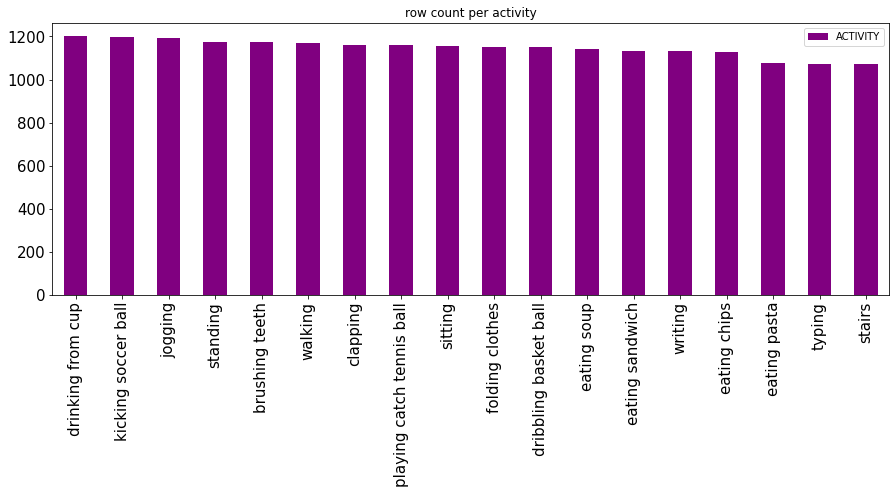

In [14]:
all_phone_accel['ACTIVITY'].map(activity_codes_mapping).value_counts().plot(kind = 'bar', 
                                                                                figsize = (15,5), 
                                                                                color = 'purple',
                                                                                title = 'row count per activity',
                                                                                legend = True,
                                                                                fontsize = 15)

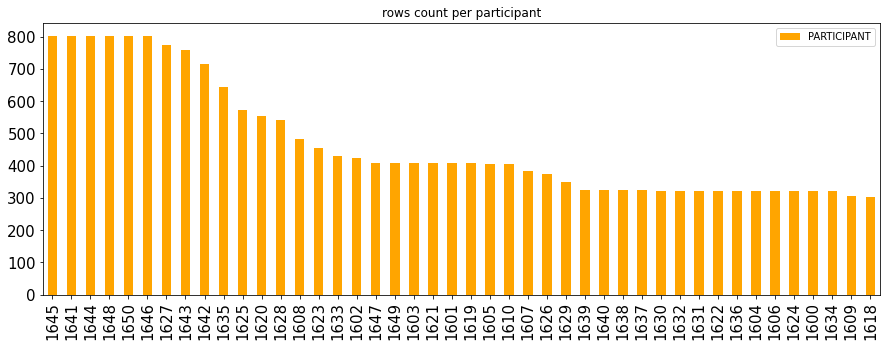

In [15]:
all_phone_accel['PARTICIPANT'].value_counts().plot(kind = 'bar',
                                                   figsize = (15,5),
                                                   color = 'orange',
                                                   title= 'rows count per participant',
                                                   legend = True,
                                                   fontsize = 15)

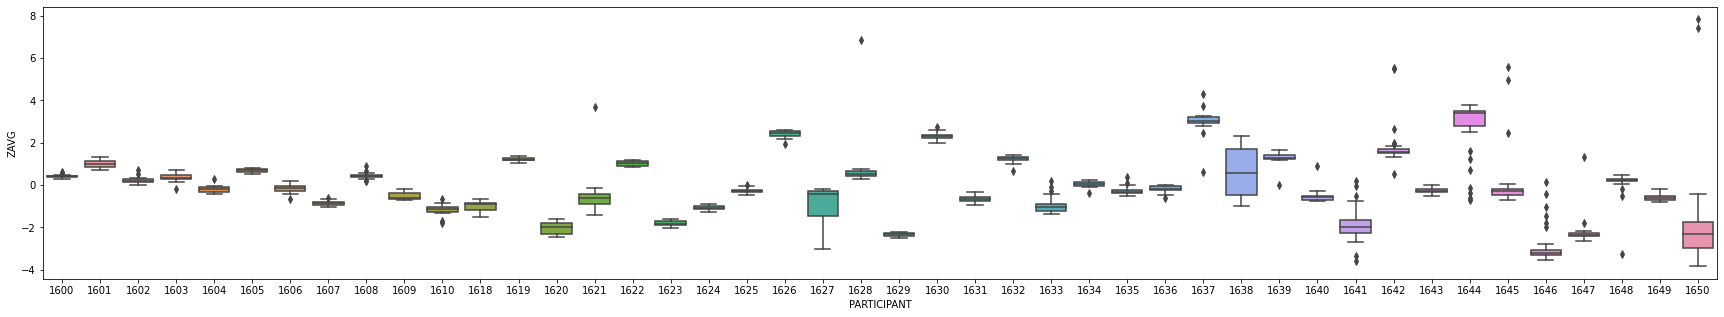

In [16]:
plt.subplots(figsize=(30, 5))
sns.boxplot(x = cel_acelerometro[cel_acelerometro['ACTIVITY']=='andar']['PARTICIPANT'],
            y = 'ZAVG',
            data = cel_acelerometro)

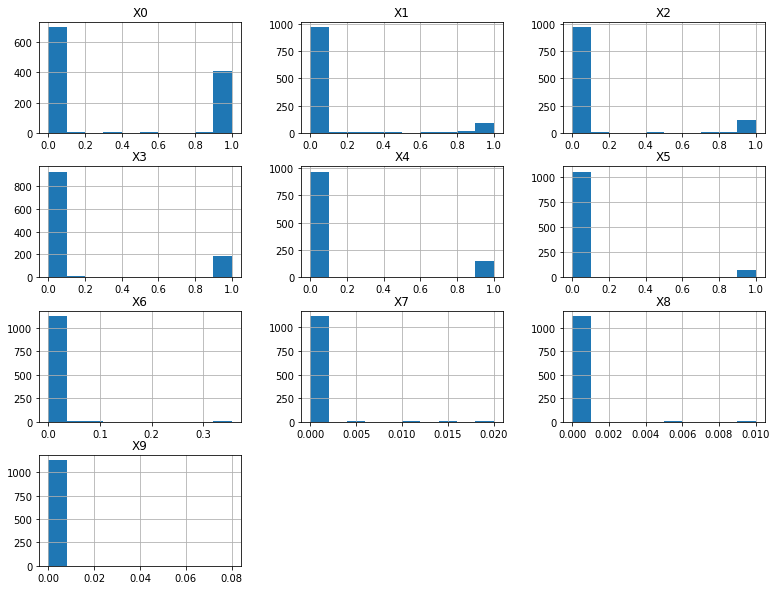

In [17]:
cel_acelerometro[cel_acelerometro['ACTIVITY']=='escrevendo'].iloc[:,1:11].hist(figsize=(13,10))
plt.show()

In [18]:
x = cel_acelerometro.drop(columns=['ACTIVITY', 'PARTICIPANT'])
y = cel_acelerometro[['ACTIVITY']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.2)

In [20]:
clr = LogisticRegression()
clr.fit(X_train, y_train)
resultado_clr = clr.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, resultado_clr))


                    precision    recall  f1-score   support

             andar       0.46      0.52      0.49       232
        aplaudindo       0.22      0.22      0.22       213
      bebendo_copo       0.16      0.17      0.17       246
     chutando_bola       0.41      0.29      0.34       248
    comendo_fritas       0.15      0.22      0.18       211
    comendo_lanche       0.27      0.10      0.15       209
     comendo_massa       0.14      0.12      0.13       229
            correr       0.69      0.84      0.76       254
         digitando       0.13      0.08      0.10       195
   dobrando_roupas       0.14      0.16      0.15       229
 dribland_basquete       0.31      0.19      0.24       249
             em_pe       0.22      0.45      0.30       238
           escadas       0.52      0.14      0.22       206
  escovando_dentes       0.15      0.19      0.17       226
        escrevendo       0.12      0.13      0.13       223
jogando_bola_tenis       0.27      0.35

[Text(0.4794478941684665, 0.9545454545454546, 'X[21] <= 0.002\nentropy = 4.169\nsamples = 16520\nvalue = [937, 949, 956, 948, 917, 925, 848, 940, 877, 924\n900, 937, 866, 948, 910, 907, 913, 918]'),
 Text(0.20636474082073433, 0.8636363636363636, 'X[22] <= 0.002\nentropy = 3.617\nsamples = 7930\nvalue = [24, 636, 844, 9, 774, 688, 707, 3, 758, 122, 81\n272, 9, 655, 771, 81, 740, 756]'),
 Text(0.10058045356371491, 0.7727272727272727, 'X[31] <= -3.625\nentropy = 3.458\nsamples = 6643\nvalue = [1, 600, 788, 4, 700, 603, 610, 3, 658, 100, 8\n82, 1, 543, 634, 2, 662, 644]'),
 Text(0.06139308855291577, 0.6818181818181818, 'X[30] <= 6.759\nentropy = 3.271\nsamples = 1883\nvalue = [0, 87, 282, 0, 166, 107, 197, 0, 316, 28, 1, 29\n0, 71, 322, 0, 195, 82]'),
 Text(0.031749460043196544, 0.5909090909090909, 'X[31] <= -8.75\nentropy = 3.238\nsamples = 1719\nvalue = [0, 59, 253, 0, 130, 107, 136, 0, 316, 28, 1, 29\n0, 63, 320, 0, 195, 82]'),
 Text(0.009935205183585313, 0.5, 'X[30] <= -1.789\nentropy 

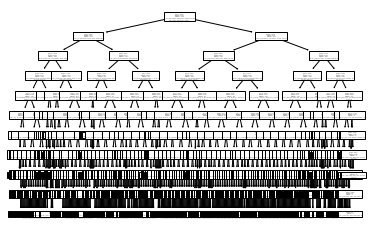

In [22]:

from sklearn import tree #Árvore de decisão

clf_tree = tree.DecisionTreeClassifier(random_state=42, 
                                  max_depth=10,
                                  criterion='entropy'
                                 )

clf_tree = clf_tree.fit(X_train, y_train)
y_pred_arvore = clf_tree.predict(X_test)
y_pred_train_arvore = clf_tree.predict(X_train)
tree.plot_tree(clf_tree)

In [23]:
import graphviz
dot_data = tree.export_graphviz(clf_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("acelerometro") 

'acelerometro.pdf'

In [26]:
print(classification_report(y_test, y_pred_arvore))

                    precision    recall  f1-score   support

             andar       0.72      0.69      0.70       232
        aplaudindo       0.54      0.57      0.55       213
      bebendo_copo       0.53      0.34      0.41       246
     chutando_bola       0.53      0.59      0.56       248
    comendo_fritas       0.57      0.37      0.45       211
    comendo_lanche       0.46      0.44      0.45       209
     comendo_massa       0.66      0.29      0.41       229
            correr       0.86      0.89      0.87       254
         digitando       0.56      0.41      0.47       195
   dobrando_roupas       0.37      0.63      0.46       229
 dribland_basquete       0.57      0.47      0.51       249
             em_pe       0.73      0.68      0.71       238
           escadas       0.45      0.59      0.51       206
  escovando_dentes       0.75      0.34      0.47       226
        escrevendo       0.54      0.61      0.57       223
jogando_bola_tenis       0.61      0.47

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(x, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(x)



In [45]:
from sklearn.cluster import KMeans
from sklearn import neighbors

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.6, random_state=42)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.7470540758676352


In [46]:
y_pred_knn_test = clf.predict(X_test)
y_pred_knn_train = clf.predict(X_train)
print(classification_report(y_pred_knn_test, y_test))
#acuracia final de 0.75 usando apenas 1 dispositivo

                    precision    recall  f1-score   support

             andar       0.88      0.72      0.80       860
        aplaudindo       0.79      0.72      0.75       749
      bebendo_copo       0.77      0.72      0.74       728
     chutando_bola       0.65      0.65      0.65       733
    comendo_fritas       0.72      0.72      0.72       686
    comendo_lanche       0.81      0.72      0.76       751
     comendo_massa       0.71      0.76      0.73       619
            correr       0.92      0.88      0.90       764
         digitando       0.82      0.83      0.82       652
   dobrando_roupas       0.69      0.65      0.67       736
 dribland_basquete       0.62      0.65      0.64       664
             em_pe       0.82      0.79      0.80       720
           escadas       0.59      0.67      0.63       583
  escovando_dentes       0.72      0.84      0.77       585
        escrevendo       0.80      0.81      0.81       680
jogando_bola_tenis       0.59      0.70